<a href="https://colab.research.google.com/github/Suja2004/PythonProjects/blob/main/AiModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cancer-Detection :malignant or benign

In [ ]:
import pandas as pd
dataset = pd.read_csv('Cancer.csv')

In [ ]:
x=dataset.drop(columns=["diagnosis(1=m, 0=b)"])

In [ ]:
y=dataset["diagnosis(1=m, 0=b)"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
import tensorflow as tf
model=tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(256, input_shape=(x_train.shape[1],), activation='sigmoid'))
model.add(tf.keras.layers.Dense(256,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=1000)
# print(model.summary())

Epoch 1/1000
15/15 [==============================] - 1s 3ms/step - loss: 0.5717 - accuracy: 0.7055
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4117 - accuracy: 0.8418
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.2910 - accuracy: 0.9077
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.2477 - accuracy: 0.9033
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.9275
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1986 - accuracy: 0.9253
Epoch 7/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.2076 - accuracy: 0.9187
Epoch 8/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.2026 - accuracy: 0.9209
Epoch 9/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1934 - accuracy: 0.9253
Epoch 10/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1898 - accuracy: 0.9297

In [ ]:
model.evaluate(x_test,y_test)


4/4 [==============================] - 0s 4ms/step - loss: 0.2489 - accuracy: 0.9298


[0.24892204999923706, 0.9298245906829834]

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary classes

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

4/4 [==============================] - 0s 7ms/step
Accuracy: 0.93
Precision: 0.98
Recall: 0.87
F1 Score: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        62
           1       0.98      0.87      0.92        52

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



Digit Recognizer

In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [37]:
data = pd.read_csv('train.csv')

In [38]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [46]:
print(X_train[:,0].shape)
Y_train

(784,)


array([6, 6, 3, ..., 1, 1, 2])

In [42]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    w2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,w2,b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1,b1,w2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = w2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max() + 1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1,A1,Z2,A2,W1,w2,X,Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dw2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = w2.T.dot(dZ2) * deriv_ReLU(Z1)
    dw1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dw1,db1,dw2,db2

def update_params(W1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    W1 = W1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return W1,b1,w2,b2


In [31]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X,Y,alpha,iterations):
    W1,b1,w2,b2 = init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(W1,b1,w2,b2,X)
        dw1,db1,dw2,db2 = back_prop(Z1,A1,Z2,A2,W1,w2,X,Y)
        W1,b1,w2,b2 = update_params(W1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i % 10 == 0:
            print("Iteration: ",i)
            print("Accuracy: ", get_accuracy(get_predictions(A2),Y))
    return W1,b1,w2,b2


In [32]:
W1,b1,w2,b2 = gradient_descent(X_train,Y_train,0.1,500)

Iteration:  0
[7 9 3 ... 9 3 9] [7 6 6 ... 7 9 1]
Accuracy:  0.0852439024390244
Iteration:  10
[7 9 4 ... 9 6 8] [7 6 6 ... 7 9 1]
Accuracy:  0.20904878048780487
Iteration:  20
[7 6 6 ... 9 6 8] [7 6 6 ... 7 9 1]
Accuracy:  0.2810487804878049
Iteration:  30
[7 6 6 ... 9 6 1] [7 6 6 ... 7 9 1]
Accuracy:  0.34202439024390247
Iteration:  40
[7 6 6 ... 9 8 1] [7 6 6 ... 7 9 1]
Accuracy:  0.4056585365853659
Iteration:  50
[7 6 6 ... 9 8 1] [7 6 6 ... 7 9 1]
Accuracy:  0.45807317073170734
Iteration:  60
[7 6 6 ... 9 8 1] [7 6 6 ... 7 9 1]
Accuracy:  0.5070243902439024
Iteration:  70
[7 6 6 ... 9 8 1] [7 6 6 ... 7 9 1]
Accuracy:  0.5484878048780488
Iteration:  80
[7 6 6 ... 9 4 1] [7 6 6 ... 7 9 1]
Accuracy:  0.5816829268292683
Iteration:  90
[7 6 6 ... 9 4 1] [7 6 6 ... 7 9 1]
Accuracy:  0.6090975609756097
Iteration:  100
[9 6 6 ... 9 4 1] [7 6 6 ... 7 9 1]
Accuracy:  0.6321951219512195
Iteration:  110
[9 6 6 ... 9 4 1] [7 6 6 ... 7 9 1]
Accuracy:  0.6516585365853659
Iteration:  120
[9 6 6 .

In [33]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  7


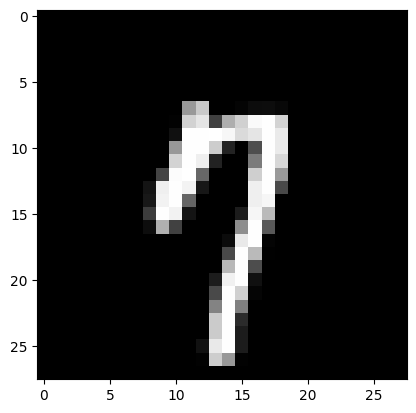

Prediction:  [6]
Label:  6


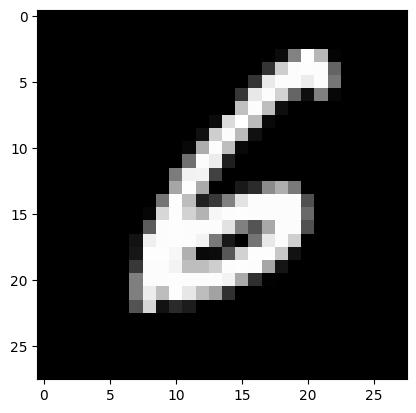

Prediction:  [6]
Label:  6


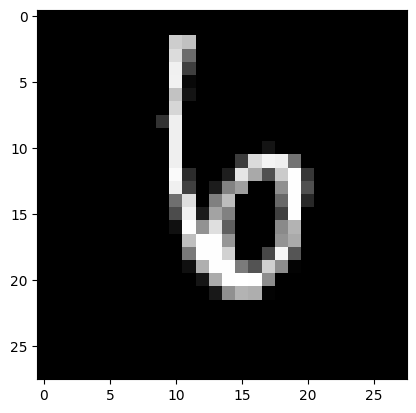

Prediction:  [0]
Label:  0


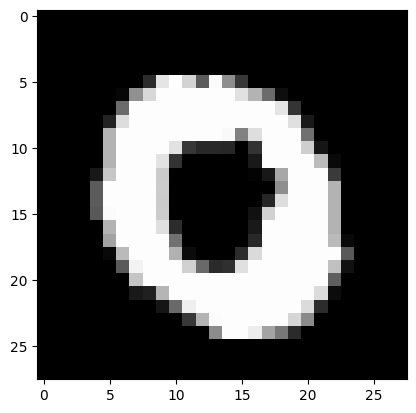

In [35]:
test_prediction(0, W1, b1, w2, b2)
test_prediction(1, W1, b1, w2, b2)
test_prediction(2, W1, b1, w2, b2)
test_prediction(3, W1, b1, w2, b2)